In [263]:
# import  pandas, numpy, matplotlib, seaborn and os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [264]:
import warnings


warnings.filterwarnings('ignore')

In [265]:
def get_dir_path(opera, job_type, is_normalized):
    # Get the current working directory
    current_dir = os.getcwd()
    
    # Navigate to the parent directory
    parent_dir = os.path.join(current_dir, os.pardir)
    
    normalized_status = "normalized" if is_normalized else "not_normalized"

    # Join the different parts of the path in a platform-independent manner
    return os.path.join(parent_dir, 'resources', 'output', 'qualitative_analysis', opera, job_type, normalized_status, 'combiner_1')

In [266]:
def read_frequency_file(file_path):
    # Read the frequency data from the file
    data = pd.read_csv(file_path, sep='\t', header=None, names=['Letter', 'Frequency'])
    return data

In [267]:
def load_data(operas, job_type, is_normalized=True):
    # Load the data for each opera
    data_frames = {}
    for opera in operas:
        dir_path = get_dir_path(opera, job_type, is_normalized)
        file_path = os.path.join(dir_path, 'part-r-00000')
        data_frames[opera] = read_frequency_file(file_path)
    return data_frames

In [268]:
def plot_letter_frequency(data_frame):
    
    # Plot the data using seaborn
    plt.figure(figsize=(14, 8))
    sns.barplot(data=data_frame, x='Letter', y='Frequency', hue='Letter', palette='Spectral', errorbar=None)
    plt.title('Letter Frequency Analysis Across Different Operas')
    plt.show()

In [269]:
def plot_letter_frequency_distribution(data_frame):
    sns.catplot(
        data=data_frame, kind="bar",
        x="Letter", y='Frequency', col="Opera", hue="Letter",
        height=4, aspect=1.5, palette='Spectral',
        col_wrap=3, legend=False  )
    
    plt.subplots_adjust(top=0.9)  # Adjust top margin to make space for title
    plt.show()


In [270]:
def plot_top_n_letters(data_frame, n=5):
    # Group the data by opera and sort the values by frequency
    data_frame_top_n_letters = data_frame.groupby('Opera').apply(lambda x: x.nlargest(n, 'Frequency')).reset_index(drop=True)
    
    sns.catplot(
        data=data_frame_top_n_letters, kind="bar",
        x="Letter", y='Frequency', col="Opera", hue="Letter",
        height=4, aspect=1.5, palette='Spectral',
        col_wrap=3, legend=False  )
    
    plt.subplots_adjust(top=0.9)  # Adjust top margin to make space for title
    plt.show()
    
    

In [271]:
def summary_statistics(data_frame):
    # Create a pivot table to summarize the data
    summary = data_frame.pivot_table(
        index='Opera',
        values='Frequency',
        aggfunc={
            'Frequency': ['count', 'mean', 'std', 'min', 'max', 
                          lambda x: np.percentile(x, 25),
                          lambda x: np.percentile(x, 50),
                          lambda x: np.percentile(x, 75)]
        }
    )

    summary.columns = ['Count', 'Mean', 'Std', 'Min', 'Max', '25%', '50%', '75%']

    return summary
    

In [272]:
def load_data_comparison(operas, job_type):
    normalized_data = load_data(operas, job_type, is_normalized=True)
    non_normalized_data = load_data(operas, job_type, is_normalized=False)
    return normalized_data, non_normalized_data

def plot_comparison(normalized_data, non_normalized_data):
    for opera in normalized_data.keys():
        plt.figure(figsize=(14, 8))
        norm_df = normalized_data[opera].assign(Type='Normalized')
        non_norm_df = non_normalized_data[opera].assign(Type='Non-Normalized')
        combined_df = pd.concat([norm_df, non_norm_df])
        sns.barplot(data=combined_df, x='Letter', y='Frequency', hue='Type')
        plt.title(f'Comparison of Normalized and Non-Normalized Frequencies for {opera.capitalize()}')
        plt.show()

In [273]:
def encode_Letter_and_Lang(data_frame):
    
    data_frame_encoded = data_frame.copy()
    
    data_frame_encoded['Letter_coded'] = data_frame_encoded['Letter'].astype('category').cat.codes
    data_frame_encoded['Lang_coded'] = data_frame_encoded['Lang'].astype('category').cat.codes


    return data_frame_encoded

In [274]:
def plot_heatmap(data_frame):
    
    data_frame_encoded = encode_Letter_and_Lang(data_frame)
    
    # Correlation matrix on Numerical columns 'Frequency', 'Letter_coded' and 'Lang_coded'
    corr = data_frame_encoded[['Letter_coded', 'Lang_coded']].corr()
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    

# General Analysis
We start by defining the operas we want to analyze, loading their data, and visualizing their letter frequencies. Then, we further analyze the data by plotting letter frequency distributions, identifying the top N letters, and summarizing the statistics. Finally, we compare English operas from different historical periods to draw insights.

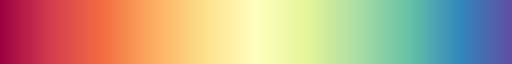

In [275]:
sns.color_palette("Spectral", as_cmap=True)

In [276]:
# Define the operas you want to analyze
operas = ['divina_commedia', 'promessi_sposi', 'gerusalemme_liberata', 'frankenstein', 'moby_dick', 'paradise_lost']
# Load the data
data_frames = load_data(operas, 'frequency')

In [277]:
data_frame = pd.concat([df.assign(Opera=opera) for opera, df in data_frames.items()])
data_frame

,Letter,Frequency,Opera
0,a,0.103408,divina_commedia
1,b,0.008419,divina_commedia
2,c,0.050534,divina_commedia
3,d,0.036996,divina_commedia
4,e,0.120234,divina_commedia
...,...,...,...
21,v,0.010597,paradise_lost
22,w,0.023245,paradise_lost
23,x,0.001726,paradise_lost
24,y,0.016100,paradise_lost


## Letter Frequency Analysis Across Different Operas
In the first analysis, we load and plot the letter frequency data for each opera. The bar plot illustrates the frequency of each letter in different operas, allowing us to compare the usage of letters in various literary works. 
This plot provides a visual representation of how certain letters are used more frequently in some operas compared to others. For instance, vowels like 'e' and 'a' might appear more frequently across all operas, which is typical in English texts.

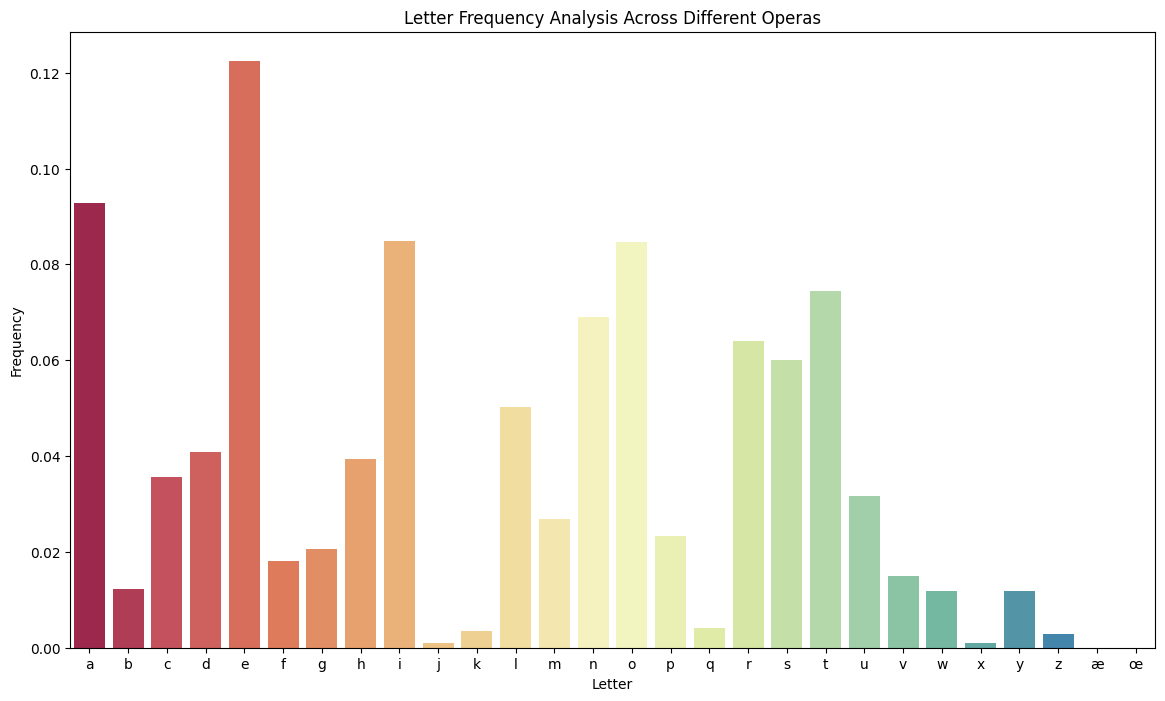

In [278]:
# Plot the data
plot_letter_frequency(data_frame)

## Letter Frequency Distribution
Next, we plot the letter frequency distribution for each opera. This helps us understand the spread and concentration of letter frequencies within each literary work. The distribution plots highlight the variability in letter usage within each opera. A higher concentration around certain frequencies indicates more uniform letter usage, whereas a wider spread suggests a more diverse letter distribution.

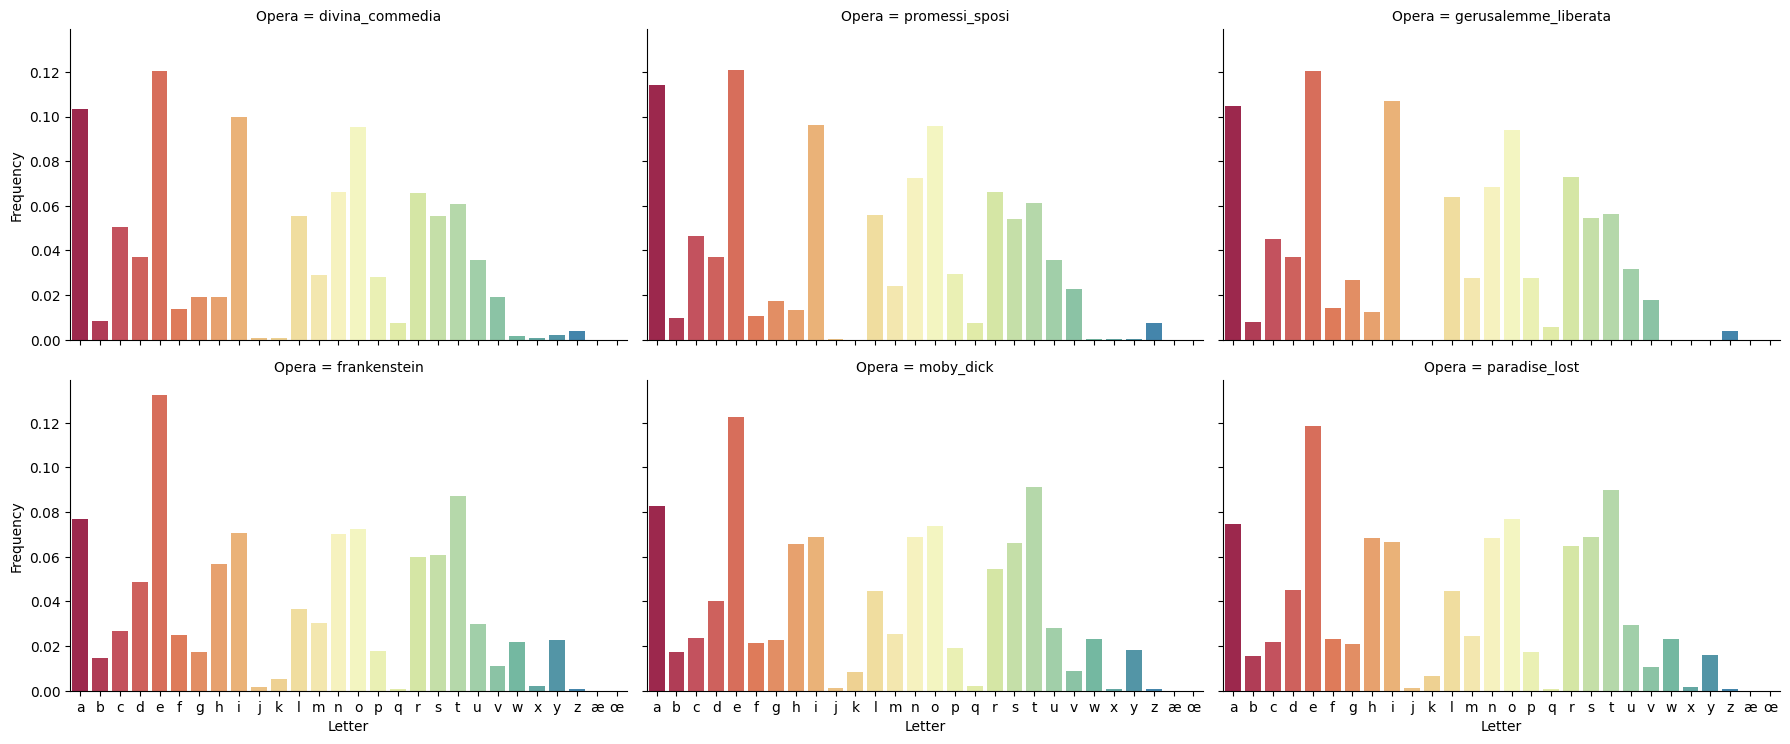

In [279]:
# Plot letter frequency distribution
plot_letter_frequency_distribution(data_frame)

## Top N Letters
We identify and plot the top N most frequently used letters in each opera. This provides a focused view of the most dominant letters in each text. Observing the top N letters gives us a quick understanding of the most significant letters in each opera. This can be useful for linguistic analysis, such as studying phonetic or stylistic patterns.

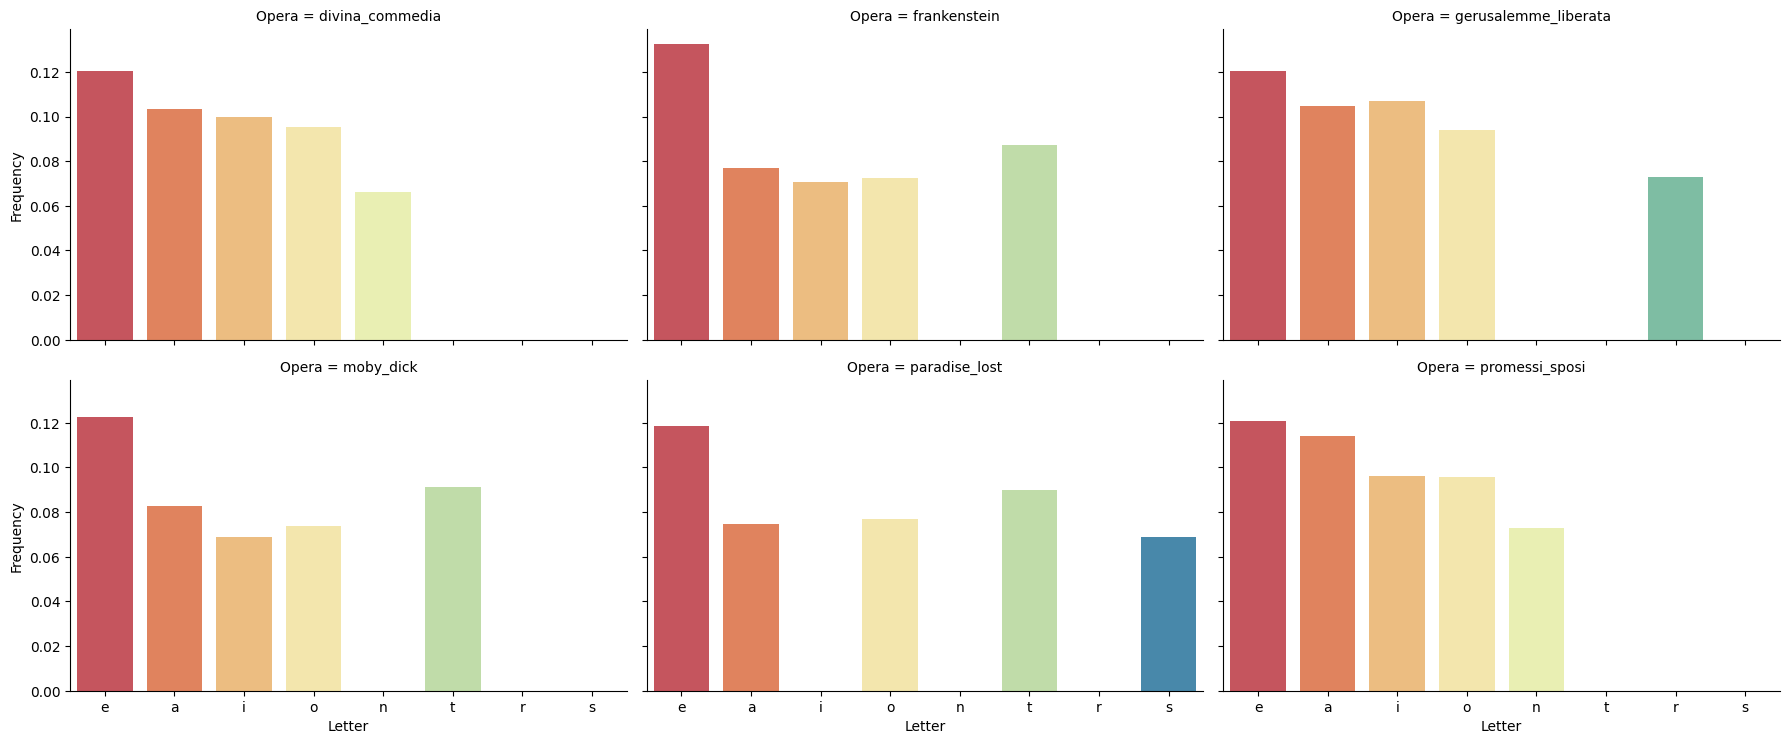

In [280]:
plot_top_n_letters(data_frame, 5)


## Summary Statistics
We compute and display summary statistics for letter frequencies in each opera. These statistics include measures such as mean, standard deviation, and percentiles. Summary statistics provide a quantitative overview of letter frequency distribution. For example, a higher mean frequency indicates that certain letters are used more frequently on average, while a higher standard deviation suggests greater variability in letter usage.

In [281]:
# Get the summary statistics
summary = summary_statistics(data_frame)
summary.T



Opera,divina_commedia,frankenstein,gerusalemme_liberata,moby_dick,paradise_lost,promessi_sposi
Count,0.007747,0.012723,0.011377,0.008828,0.015544,0.007553
Mean,0.028465,0.026668,0.029858,0.023393,0.023960,0.023974
Std,0.059509,0.060450,0.064862,0.065791,0.067917,0.058665
Min,26.000000,27.000000,24.000000,28.000000,26.000000,27.000000
Max,0.120234,0.132554,0.120409,0.122390,0.118359,0.120643
25%,0.038462,0.037037,0.041667,0.035714,0.038462,0.037037
50%,0.000599,0.000060,0.000007,0.000006,0.000582,0.000013
75%,0.036055,0.033166,0.037107,0.032932,0.032412,0.037221


## Heatmap of Letter Frequencies
We generate a heatmap to visualize the letter frequencies across different operas. This heatmap provides an at-a-glance comparison of letter usage patterns in a tabular format.
The heatmap allows us to compare the relative frequency of each letter across all operas simultaneously. It can reveal patterns such as which letters are consistently high or low across different works.

In [282]:
lang_dict ={
    'divina_commedia': 'it',
    'promessi_sposi': 'it',
    'gerusalemme_liberata': 'it',
    'moby_dick': 'en',
    'paradise_lost': 'en',
    'frankenstein': 'en'
}

data_frame['Lang'] = data_frame['Opera'].apply(lambda x: lang_dict[x] if x in lang_dict else None) 

data_frame

,Letter,Frequency,Opera,Lang
0,a,0.103408,divina_commedia,it
1,b,0.008419,divina_commedia,it
2,c,0.050534,divina_commedia,it
3,d,0.036996,divina_commedia,it
4,e,0.120234,divina_commedia,it
...,...,...,...,...
21,v,0.010597,paradise_lost,en
22,w,0.023245,paradise_lost,en
23,x,0.001726,paradise_lost,en
24,y,0.016100,paradise_lost,en


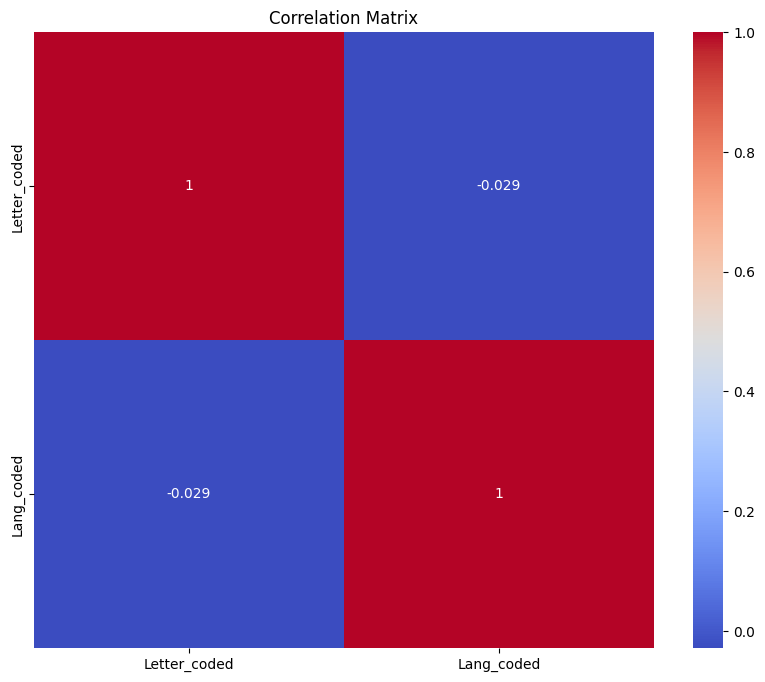

In [283]:
# Plot heatmap of letter frequencies
plot_heatmap(data_frame)

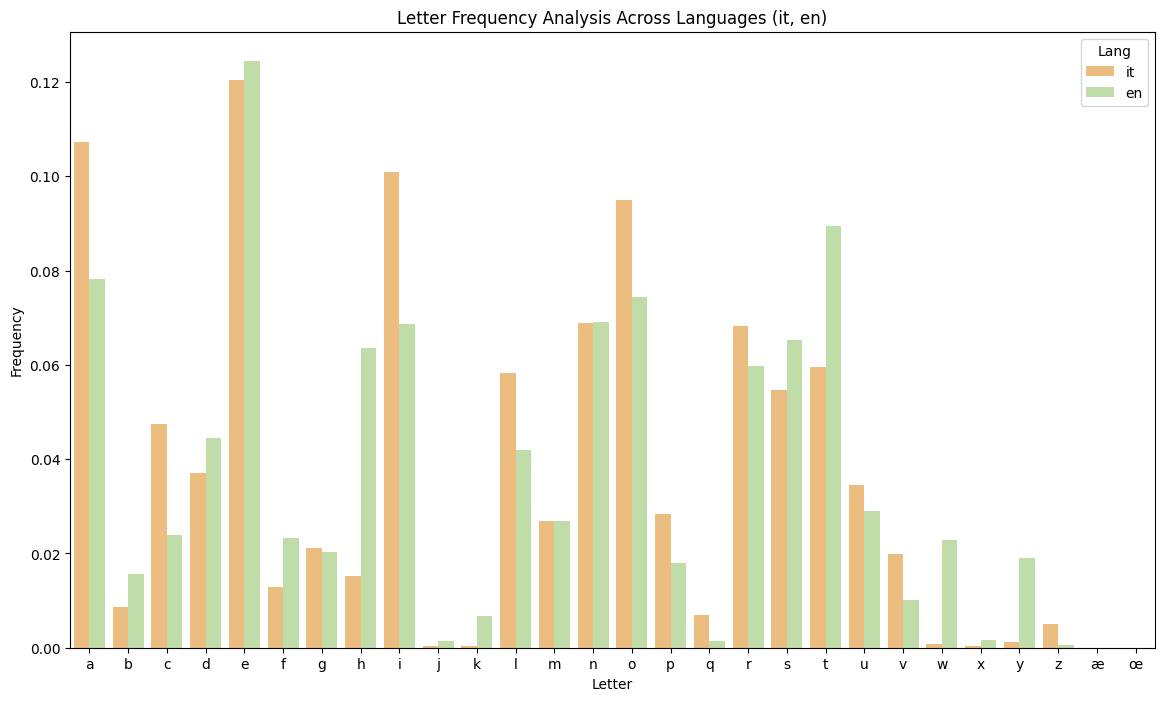

In [284]:
# Plot the data using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=data_frame, x='Letter', y='Frequency', hue='Lang', palette='Spectral', errorbar=None)
plt.title('Letter Frequency Analysis Across Languages (it, en)')
plt.show()

# Analysis of English operas through different time epochs

In [285]:
year_dict ={
    'divina_commedia': 1362,
    'promessi_sposi': 1840,
    'gerusalemme_liberata': 1581,
    'moby_dick': 1851,
    'paradise_lost': 1667,
    'frankenstein': 1818
}

data_frame['Year'] = data_frame['Opera'].apply(lambda x: year_dict[x] if x in year_dict else None) 

data_frame

,Letter,Frequency,Opera,Lang,Year
0,a,0.103408,divina_commedia,it,1362
1,b,0.008419,divina_commedia,it,1362
2,c,0.050534,divina_commedia,it,1362
3,d,0.036996,divina_commedia,it,1362
4,e,0.120234,divina_commedia,it,1362
...,...,...,...,...,...
21,v,0.010597,paradise_lost,en,1667
22,w,0.023245,paradise_lost,en,1667
23,x,0.001726,paradise_lost,en,1667
24,y,0.016100,paradise_lost,en,1667


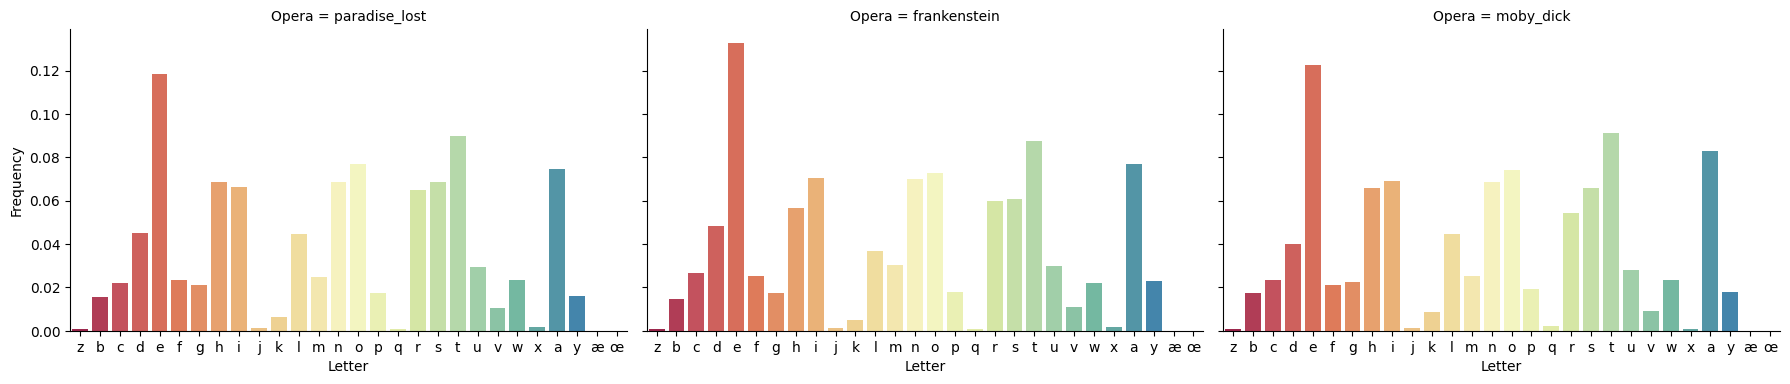

In [286]:
df_en = data_frame.loc[data_frame.Lang == 'en', :]

# Sort by  year and Frequency
# Ordina per anno e frequenza
df_en = df_en.sort_values(by=['Year'])

sns.catplot(
    data=df_en, kind="bar",
    x="Letter", y='Frequency', col="Opera", hue="Letter",
    height=4, aspect=1.5, palette='Spectral',
    col_wrap=3, legend=False  )

plt.subplots_adjust(top=0.9)  # Adjust top margin to make space for title
plt.show()

# Analysis of Italian operas through different time epochs

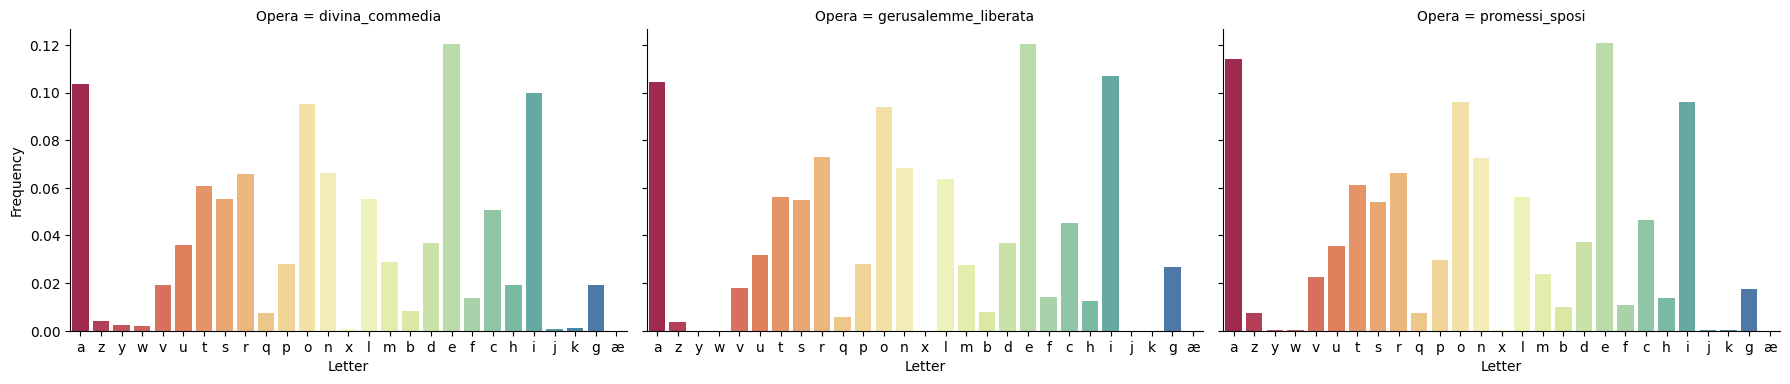

In [287]:
df_it = data_frame.loc[data_frame.Lang == 'it', :]

# Sort by  year and Frequency
# Ordina per anno e frequenza
df_it = df_it.sort_values(by=['Year'])

sns.catplot(
    data=df_it, kind="bar",
    x="Letter", y='Frequency', col="Opera", hue="Letter",
    height=4, aspect=1.5, palette='Spectral',
    col_wrap=3, legend=False  )

plt.subplots_adjust(top=0.9)  # Adjust top margin to make space for title
plt.show()

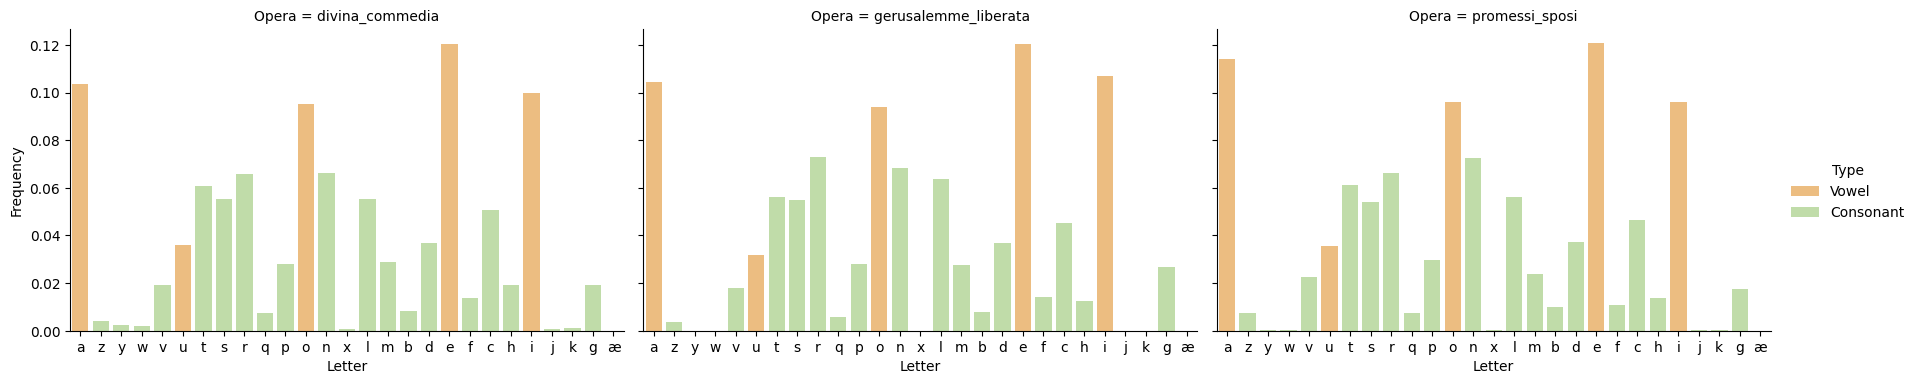

In [288]:
# Divide between vowels and consonants
vowels = ['a', 'e', 'i', 'o', 'u',s]

df_it = data_frame.loc[data_frame.Lang == 'it', :]

# Add a new column to specify if the letter is a vowel or a consonant
df_it['Type'] = df_it['Letter'].apply(lambda x: 'Vowel' if x in vowels else 'Consonant')

# Sort by  year and Frequency
# Ordina per anno e frequenza
df_it = df_it.sort_values(by=['Year'])

sns.catplot(
    data=df_it, kind="bar",
    x="Letter", y='Frequency', col="Opera", hue="Type",
    height=4, aspect=1.5, palette='Spectral',
    col_wrap=3)

plt.subplots_adjust(top=0.9)  # Adjust top margin to make space for title
plt.show()